#### Importações de Bibliotecas

In [1]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import mean_squared_error
#from sklearn.model_selection import cross_val_score, KFold
#from sklearn.linear_model import Ridge
#from sklearn.metrics import r2_score
#from sklearn.linear_model import Lasso
from sklearn.metrics import confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report


#### DF em estudo

In [2]:
diabetes_df = pd.read_csv('diabetes_clean.csv')

In [3]:
diabetes_df

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### Exercício 1

In [4]:
X = diabetes_df.drop('diabetes', axis=1)
y = diabetes_df['diabetes']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [6]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [7]:
y_pred = knn.predict(X_test)

In [8]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [9]:
accuracy = accuracy_score(y_test, y_pred)

In [10]:
print("Confusion Matrix:")
print(conf_matrix)
print("Accuracy:")
print("%", round(accuracy*100,2))

Confusion Matrix:
[[132  18]
 [ 49  32]]
Accuracy:
% 71.0


#### Exxercício 2

In [11]:
logreg=LogisticRegression()

In [12]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [13]:
y_pred = logreg.predict(X_test)

In [14]:
y_pred_probs = logreg.predict_proba(X_test)[:, 1]

In [15]:
print(y_pred_probs[0:10])

[0.23040853 0.28910623 0.73169396 0.63125231 0.45115254 0.07690539
 0.73115032 0.12432893 0.04388881 0.34826865]


#### Exercício 3

In [16]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

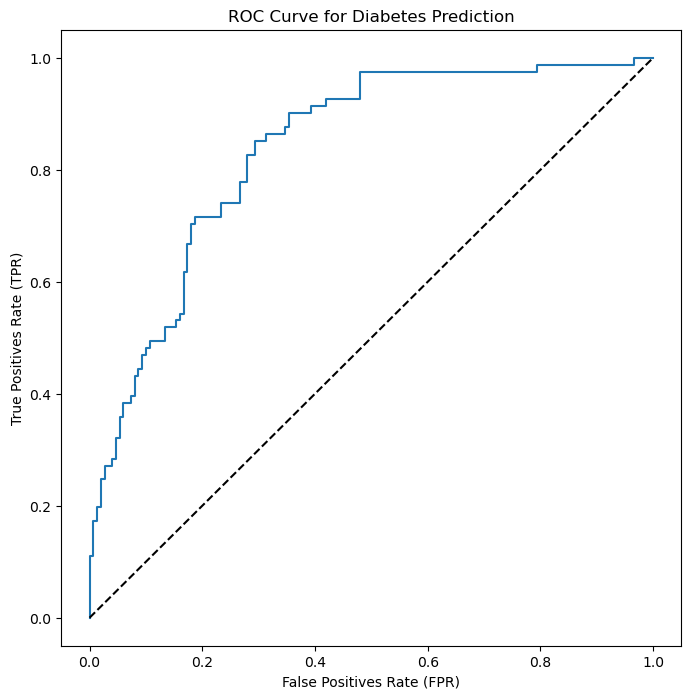

In [17]:
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positives Rate (FPR)')
plt.ylabel('True Positives Rate (TPR)')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

#### Exercício 4

Resposta 3.

#### Exercício 5

In [18]:
roc_auc = roc_auc_score(y_test, y_pred_probs)

In [19]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [20]:
class_report= classification_report(y_test, y_pred)

In [21]:
print('roc_auc_score\n\n',roc_auc)

roc_auc_score

 0.8360493827160493


In [22]:
print('confusion_matrix\n\n',conf_matrix )

confusion_matrix

 [[129  21]
 [ 39  42]]


In [23]:
print('classification_report\n\n',class_report)

classification_report

               precision    recall  f1-score   support

           0       0.77      0.86      0.81       150
           1       0.67      0.52      0.58        81

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231



#### Pergunta extra

##### Usando o resultado da chamada das 2 funções, 'predict' e 'predict_proba', e visualizando apenas os primeiros 10 ou 15 resultados, justifique a previsão feita na chamada do 'predict', com os valores obtidos na chamada do 'predict_proba'.

In [24]:
y_pred[0:15]

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [25]:
y_pred_probs = logreg.predict_proba(X_test) # retirar [:1] para observar ambas as colunas.

In [26]:
y_pred_probs[0:15]

array([[0.76959147, 0.23040853],
       [0.71089377, 0.28910623],
       [0.26830604, 0.73169396],
       [0.36874769, 0.63125231],
       [0.54884746, 0.45115254],
       [0.92309461, 0.07690539],
       [0.26884968, 0.73115032],
       [0.87567107, 0.12432893],
       [0.95611119, 0.04388881],
       [0.65173135, 0.34826865],
       [0.94800837, 0.05199163],
       [0.79792402, 0.20207598],
       [0.93998311, 0.06001689],
       [0.52423388, 0.47576612],
       [0.1844443 , 0.8155557 ]])

A previsão de 'y_pred' é determinada pelo limiar de decisão, que geralmente é definido em 0.5 por padrão.  
Quando se chama o método 'predict_proba', o método retorna as probabilidades associadas a cada classe para cada amostra. Neste caso, existem duas classes (0 e 1), portanto, duas colunas para cada amostra na matriz 'y_pred_probs'.
Se o resultado da probabilidade estimada de 'y_pred_probs' for maior ou igual que o limiar definido, a classe prevista será '0' no caso de isso se verificar na primeira coluna da matriz (referente à hipotese de não haver diabetes); e 1 no caso de acontecer na segunda coluna da matriz (coluna referente à hipotese de haver diabetes).  
Neste caso, "0" representa "não ter diabetes" e "1" representa "ter diabetes".  
Portanto, a previsão feita pelo método 'predict' é coerente com a classe obtida cuja probabilidade é maior na coluna retornada pelo método 'predict_proba'.